In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [ ]:
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv('trainset.csv') 
df_test = pd.read_csv('testset.csv')

In [4]:
columns_to_remove = ['endYear','awardWins', 'worstRating', 'bestRating', 'totalCredits', 'awardNominationsExcludeWins', 'externalLinks'
                    , 'isRatable']

# Loại bỏ các cột khỏi dataset 'trainset'
df_train= df_train.drop(columns=columns_to_remove)
# Loại bỏ các cột khỏi dataset 'testset'
df_test = df_test.drop(columns=columns_to_remove)

In [5]:
my_dict = {
    '0 - 4': 0,
    '4 - 6': 1,
    '6 - 7': 2,
    '7 - 8': 3,
    '8 - 9': 4,
    '9 - 10': 5
}
df_train['rating'] = df_train['rating'].map(my_dict)
df_test['rating'] = df_test['rating'].map(my_dict)


In [6]:
X_train = df_train.drop(columns=["rating"])
y_train = df_train["rating"]
X_test = df_test.drop(columns=["rating"])
y_test = df_test["rating"]

In [7]:
df_train.dtypes

rating                  int64
startYear               int64
runtimeMinutes        float64
totalImages             int64
totalVideos             int64
criticReviewsTotal      int64
titleType             float64
canHaveEpisodes         int64
isAdult                 int64
numRegions              int64
userReviewsTotal        int64
ratingCount             int64
genres                float64
castNumber              int64
companiesNumber         int64
regions               float64
writerCredits           int64
directorsCredits        int64
soundMixes            float64
quotesTotal             int64
continent             float64
ratewinningawards     float64
dtype: object

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

# Fit on training data, then transform both train and test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

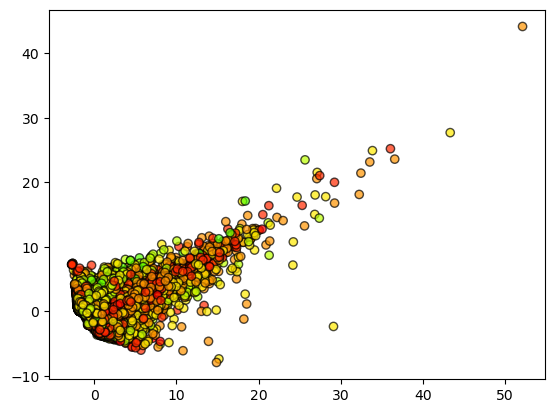

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Non linear SVM

## DF1

In [33]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']},
                
]

In [34]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### Cố định kernel sigmoid

In [3]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import defaultdict

In [31]:
df1 = pd.read_csv('df1_SVM.csv') 
test1 = pd.read_csv('test1_SVM.csv')

In [32]:
df_train_1 = df1.drop(columns=["rating"])
y1_train = df1["rating"]
X_test_1 = test1.drop(columns=["rating"])
y_test_1 = test1["rating"]

In [4]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
             'kernel': ['sigmoid']},
                
]

In [2]:
from sklearn.model_selection import GridSearchCV

In [8]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'kernel': 'sigmoid'}


In [9]:
param_grid=[
            {'C': [100],
             'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['sigmoid']},
                
]

In [10]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [11]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['sigmoid']},
                
]

In [12]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}


## DF2

In [13]:
df2 = pd.read_csv('df2_SVM.csv') 
test2 = pd.read_csv('test2_SVM.csv')

In [14]:
df_train_2 = df2.drop(columns=["rating"])
y2_train = df2["rating"]
X_test_2 = test2.drop(columns=["rating"])
y_test_2 = test2["rating"]

### Sigmoid

In [15]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
             'kernel': ['sigmoid']},
                
]

In [19]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_2,y2_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [20]:
param_grid=[
            {'C': [100],
             'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['sigmoid']},
                
]

In [21]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_2,y2_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [22]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['sigmoid']},
                
]

In [23]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_2,y2_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}


### RBF

In [24]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']},
                
]

In [25]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_2,y2_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


## DF3

In [26]:
df3 = pd.read_csv('df3_SVM.csv') 
test3 = pd.read_csv('test3_SVM.csv')

In [27]:
df_train_3 = df3.drop(columns=["rating"])
y3_train = df3["rating"]
X_test_3 = test3.drop(columns=["rating"])
y_test_3 = test3["rating"]

### RBF

In [28]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1
)

optimal_params.fit(df_train_3,y3_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### Sigmoid

In [29]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['sigmoid']},
                
]

In [30]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_3,y3_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}


# XỬ LÝ LẤY TIẾP CÁC SUBSET KHÁC

In [35]:
df_train = pd.read_csv('trainset.csv') 
df_test = pd.read_csv('testset.csv')

In [36]:
columns_to_remove = ['endYear','awardWins', 'worstRating', 'bestRating', 'totalCredits', 'awardNominationsExcludeWins', 'externalLinks'
                    , 'isRatable']

# Loại bỏ các cột khỏi dataset 'trainset'
df_train= df_train.drop(columns=columns_to_remove)
# Loại bỏ các cột khỏi dataset 'testset'
df_test = df_test.drop(columns=columns_to_remove)

In [37]:
my_dict = {
    '0 - 4': 0,
    '4 - 6': 1,
    '6 - 7': 2,
    '7 - 8': 3,
    '8 - 9': 4,
    '9 - 10': 5
}
df_train['rating'] = df_train['rating'].map(my_dict)
df_test['rating'] = df_test['rating'].map(my_dict)


In [38]:
X_train = df_train.drop(columns=["rating"])
y_train = df_train["rating"]
X_test = df_test.drop(columns=["rating"])
y_test = df_test["rating"]

In [39]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Giả sử df_train là DataFrame của bạn
# df_train = pd.read_csv('your_dataset.csv')

# Xác định biến phân loại (rating)
X = df_train.drop('rating', axis=1)  # Các thuộc tính ngoài rating
y = df_train['rating']  # Thuộc tính rating

# Tạo StratifiedKFold để chia thành 10 phần
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Duyệt qua các phân chia và tạo các biến df1, df2, ..., df10
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Tạo subset từ các chỉ số được chia
    subset = df_train.iloc[test_index]
    # Tạo tên biến động cho mỗi subset và gán nó cho biến
    globals()[f'df{i}'] = subset


In [40]:
# Tính tổng số lượng mỗi lớp trong thuộc tính 'rating'
rating_counts = df1['rating'].value_counts()

# In kết quả
print(rating_counts)

rating
3    3360
2    2698
1    2109
4    1533
0     361
5     299
Name: count, dtype: int64


In [41]:
# Lưu df1, df2, df3 vào các file CSV
df4.to_csv('df4_SVM.csv', index=False)
df5.to_csv('df5_SVM.csv', index=False)
df6.to_csv('df6_SVM.csv', index=False)

In [42]:
# cHIA TEST SET

In [43]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Giả sử df_train là DataFrame của bạn
# df_train = pd.read_csv('your_dataset.csv')

# Xác định biến phân loại (rating)
X = df_test.drop('rating', axis=1)  # Các thuộc tính ngoài rating
y = df_test['rating']  # Thuộc tính rating

# Tạo StratifiedKFold để chia thành 10 phần
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Duyệt qua các phân chia và tạo các biến df1, df2, ..., df10
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Tạo subset từ các chỉ số được chia
    subset = df_test.iloc[test_index]
    # Tạo tên biến động cho mỗi subset và gán nó cho biến
    globals()[f'test{i}'] = subset

In [44]:
# Lưu  file CSV
test4.to_csv('test4_SVM.csv', index=False)
test5.to_csv('test5_SVM.csv', index=False)
test6.to_csv('test6_SVM.csv', index=False)

# TEST TIẾP VỚI CÁC SUBSET

## DF4

In [46]:
df4 = pd.read_csv('df4_SVM.csv') 
test4 = pd.read_csv('test4_SVM.csv')

In [47]:
df_train_4 = df4.drop(columns=["rating"])
y4_train = df4["rating"]
X_test_4 = test4.drop(columns=["rating"])
y_test_4 = test4["rating"]

### sigmoid

In [48]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['sigmoid']},
                
]

In [49]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_4,y4_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}


# rbf

In [50]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']},
                
]

In [51]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1
)

optimal_params.fit(df_train_4,y4_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


### DF5

In [52]:
df5 = pd.read_csv('df5_SVM.csv') 
test5 = pd.read_csv('test5_SVM.csv')

In [53]:
df_train_5 = df5.drop(columns=["rating"])
y5_train = df5["rating"]
X_test_5 = test5.drop(columns=["rating"])
y_test_5 = test5["rating"]

In [54]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['sigmoid']},
                
]

In [55]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1,
)

optimal_params.fit(df_train_5,y5_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [56]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']},
                
]

In [58]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
 n_jobs=-1
)

optimal_params.fit(df_train_5,y5_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
